In [1]:
import numpy as np                # We always need this
import pandas as pd               # Pandas is a library for working with tables of data 
                                  # called Data Frames
import matplotlib.pyplot as plt   # We also want to plot stuff...

# Diagnosing tumours.

The .csv file "wdbc.csv" contains a large data set (the "Breast Cancer Wisconsin (Diagnostic) Data Set (WDBC)"). It can be obtained from https://www.openml.org/d/1510 .

This is a real data set (i.e. not simulated but contains actual data). It contains various measurements on breast cancer cells, totally 30 different variables such as "radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", etc.

In our data frame they are just called Var 1, Var 2, etc. :)

Each case also has a diagnosis: Malignant (M) or Benign (B).

There are totally 569 observations. The patient id's are of course anonymized.

Let's read the data frame and take a look at the content:

In [2]:
df = pd.read_csv("wdbc.csv",index_col=0)

In [3]:
df         # Let's look at the Data Frame

,Diagnosis,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,...,Var 21,Var 22,Var 23,Var 24,Var 25,Var 26,Var 27,Var 28,Var 29,Var 30
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


# Problem:

Would it be possible for us to use the 30 given variables to predict (diagnose) whether we are looking at a malignant or a benign case? Let's try!


### Extracting the numerical data:

Since you haven't been taught in detail how data frames work, I'll do most manipulations, just leaving the interpetation to you.

First we extract the columns that contain numerical data (the 30 variables).

In [4]:
df_data = df.loc[:,'Var 1':'Var 30'] 
df_data

,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,Var 10,...,Var 21,Var 22,Var 23,Var 24,Var 25,Var 26,Var 27,Var 28,Var 29,Var 30
ID,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


As you can see, some variables contain much larger values than others (e.g. **Var 4** and **Var 5**). Because of this difference in scale, those variables with large numerical values will have larger variance and be overrepresented in our principal components. This introduces an undesireable bias that we would like to get rid of.

To get rid of that effect, we will work with normalized data instead, i.e. after centralizing (subtracting the mean from each column) we also normalize (divide each column with its standard deviation). This is easily done:

In [5]:
N=(df_data-df_data.mean())/df_data.std()
N

,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,Var 10,...,Var 21,Var 22,Var 23,Var 24,Var 25,Var 26,Var 27,Var 28,Var 29,Var 30
ID,,,,,,,,,,,,,,,,,,,,,
842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
926682,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
926954,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129


As you can see, the numbers are now more comparable in size.

The covariance matrix can also be easily obtained. Note that since we're working with normalized data, the covariance matrix is actually the correlation coefficient matrix $R$:

In [6]:
R = N.cov()
np.round(R,3)

,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,Var 10,...,Var 21,Var 22,Var 23,Var 24,Var 25,Var 26,Var 27,Var 28,Var 29,Var 30
Var 1,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
Var 2,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
Var 3,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
Var 4,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
Var 5,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
Var 6,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
Var 7,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
Var 8,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
Var 9,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
Var 10,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,...,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


# Visualization

Now let's do a bit of plotting. From our original dataframe `df`, let's say we want to plot the observations of **Var 2** against the observations of **Var 1**. Easy!

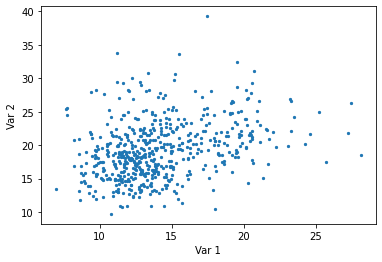

In [7]:
df.plot.scatter('Var 1','Var 2',marker='.')
plt.show()

Hmm, it would also be nice to see which data points represent malignant cases and which ones represent the benign ones.

Below is a small trick that assigns a red color to the malignant cases and a green color to the benign ones. You don't have to understand how it's done.

In [8]:
colors = {'M':'red','B':'green'}
colorlist = df["Diagnosis"].apply(lambda x : colors[x])

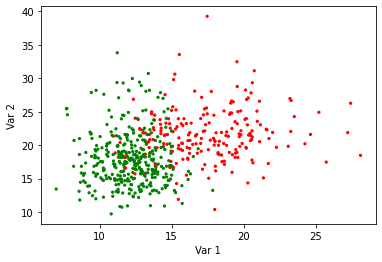

In [9]:
df.plot.scatter('Var 1','Var 2',c=colorlist,marker='.')
plt.show()

Or, we could plot the first two normalized variables from our normalized dataframe `N`. The picture is the same, but the numbers are different.

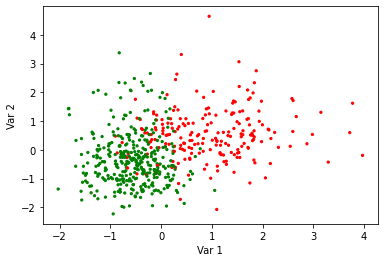

In [10]:
N.plot.scatter('Var 1','Var 2',c=colorlist,marker='.')
plt.show()

From a visual inspection, we see that in these two variables, there is no clear separation between the malignant and benign cases. In other words, we can't use only these two variables to make a meaningful diagnosis.

# Exercise 2(a)

Look at the correlation coefficient matrix that we calculated above and pick three pairs of variables:

- Pick one pair that is highly positively correlated ($r>0.95$).
- Pick one pair that is somewhat negatively correlated ($r< -0.3$).
- Pick one pair that seem uncorrelated ($r\in (-0.05,0.05)$).

For each pair, make a plot like the one above. Use the same trick as above to assign a red/green color to the malignant/benign cases.

Submit all three plots in LAMS.

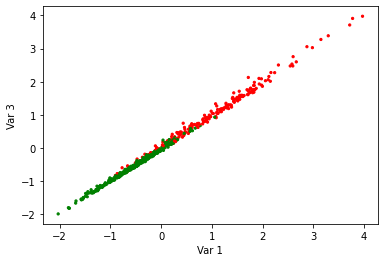

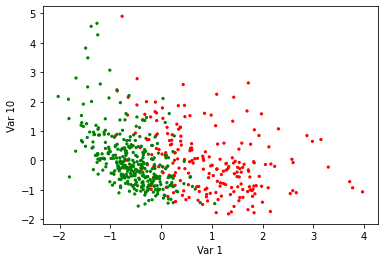

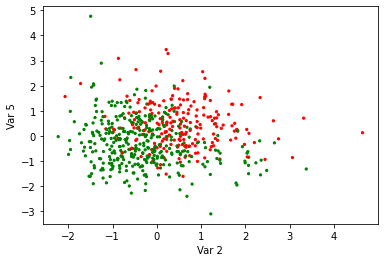

In [17]:
# Go ahead
# Var3, Var1
# Var1, Var10
# Var2, Var5
N.plot.scatter('Var 1','Var 3',c=colorlist,marker='.')
N.plot.scatter('Var 1','Var 10',c=colorlist,marker='.')
N.plot.scatter('Var 2','Var 5',c=colorlist,marker='.')
plt.show()

# Performing PCA

As you have seen now, out of the 30 given variables, many are highly correlated with each other. This means that the data set actully contains a lot of redundancy (many variables are determined by each other) and doing a PCA should enable us to reduce the data set to a smaller number of uncorrelated variables. Let's try it:

As mentioned above, we want to do our analysis on the normalized variables, so we should look at eigenvalues and eigenvectors of the correlation coefficient matrix $R$.

In [12]:
l, Q = np.linalg.eig(R)   # Create arrays l, and Q with eigenvalues and eigenvectors
# Then we sort in descending order.
idx = l.argsort()[::-1]
l = l[idx]
Q = Q[:,idx]

Let's take a look at the eigenvalues

In [13]:
print(np.round(l,1))   # Let's look at our sorted list of eigenvalues.

[13.3  5.7  2.8  2.   1.6  1.2  0.7  0.5  0.4  0.4  0.3  0.3  0.2  0.2
  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0. ]


As explained previously, each eigenvalue denotes the variance of the corresponding principal component. 

Recall also that in the original but normalized data set, each variable has variance 1 (since the variables were normalized), but the principal components may have a larger or smaller variance (the eigenvalues above). The total variance of the 30 components is the same though:

In [14]:
sum(l)  # Calculate the sum of the eigenvalues 
        # (i.e. the sum of the variance of the 30 principal components)

30.00000000000002

# Exercise 2(b)

1. How much of the total variance is attributed by the first two principal components.
2. How many principal components do we need to attribute for at least 90% of the total variance?

Submit your answers in LAMS.
 
- Recall that for example `l[0:3]` will give you the first three entries `l[0]`, `l[1]` and `l[2]` of `l`. 
- To get the sum of the three first entries you can use `sum(l[0:3])`.
- The sum of all eigenvalues is simply `sum(l)`


In [24]:
# Go ahead
sum(l[:2])/sum(l)

0.6324320765155946

In [26]:
for i in range(len(l)):
    print(f"{i + 1}: {sum(l[:i])/sum(l)}")

1: 0.0
2: 0.44272025607526366
3: 0.6324320765155946
4: 0.7263637090899084
5: 0.7923850582446099
6: 0.8473427431680726
7: 0.8875879635669061
8: 0.9100953006967311
9: 0.9259825386969442
10: 0.9398790324425353
11: 0.9515688143366668
12: 0.9613660042126471
13: 0.9700713832200258
14: 0.9781166330919931
15: 0.9833502905469195
16: 0.9864881227145469
17: 0.9891502160796991
18: 0.9911301840050234
19: 0.9928841434552498
20: 0.9945333965144749
21: 0.9955720432628136
22: 0.9965711397265139
23: 0.9974857864775682
24: 0.9982971477364674
25: 0.998898981303139
26: 0.9994150236823043
27: 0.9996876116777818
28: 0.9999176271402878
29: 0.9999706050693258
30: 0.9999955651725726


# Exercise 2(c)

1. Create a new dataframe `Np` containing the principal components of your nomalized data `N`.
2. Create a scatter plot of two first principal components against each other. If the columns of `Np` have no labels, you can access them by index instead. Just remember that the first column has index 0. Also, use the same trick as before, to assign a red color to malignant cases and green color to benign cases.
3. Does it look like we could use the first two principal components to guess whether an observation comes from a malignant or a benign case. Explain with a few words (just the idea, no detail needed).

In [44]:
Np = N @ Q

In [45]:
Np.columns = [f"Pc{x+1}" for x in range(30)]

<AxesSubplot:xlabel='Pc1', ylabel='Pc2'>

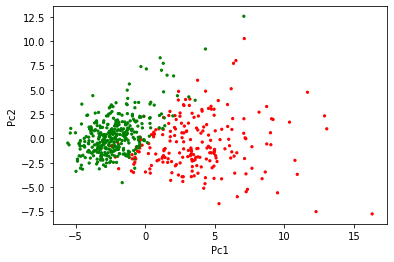

In [46]:
Np.plot.scatter("Pc1","Pc2", c=colorlist,marker='.')

In [50]:
# for i in range(1,30):    
#     Np.plot.scatter(f"Pc{i}", f"Pc{i+1}", c=colorlist,marker='.')
colorlist

ID
842302        red
842517        red
84300903      red
84348301      red
84358402      red
            ...  
926424        red
926682        red
926954        red
927241        red
92751       green
Name: Diagnosis, Length: 569, dtype: object

In [54]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(Np[["Pc1", "Pc2"]], colorlist)

C:\Users\nghoc\miniconda3\envs\ds\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()